In [3]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.0/590.0 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.9/578.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfull

In [4]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2024-03-02 11:50:43--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.03s   

2024-03-02 11:50:44 (10.9 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2024-03-02 11:50:44--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==============

In [103]:
df_train = pd.read_csv(train_file_path, sep='\t',header=None)
df_test = pd.read_csv(test_file_path, sep='\t',header=None)

column_titles = ['type','text']
df_train.columns = column_titles
df_test.columns = column_titles

df_train['type'] = df_train['type'].map(dict(ham=1, spam=0))
df_test['type'] = df_test['type'].map(dict(ham=1, spam=0))

print(df_train)

      type                                               text
0        1  ahhhh...just woken up!had a bad dream about u ...
1        1                           you can never do nothing
2        1  now u sound like manky scouse boy steve,like! ...
3        1  mum say we wan to go then go... then she can s...
4        1  never y lei... i v lazy... got wat? dat day ü ...
...    ...                                                ...
4174     1  just woke up. yeesh its late. but i didn't fal...
4175     1  what do u reckon as need 2 arrange transport i...
4176     0  free entry into our £250 weekly competition ju...
4177     0  -pls stop bootydelious (32/f) is inviting you ...
4178     1  tell my  bad character which u dnt lik in me. ...

[4179 rows x 2 columns]


In [106]:
train_text = df_train['text']

encoder = tf.keras.layers.TextVectorization()

encoder.adapt(train_text)

vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'to', 'i', 'you', 'a', 'the', 'u', 'and', 'in', 'is',
       'me', 'my', 'for', 'your', 'of', 'it', 'call', 'have', 'on'],
      dtype='<U48')

In [107]:
example_text = train_text
encoded_example = encoder(example_text).numpy()
#print(example_text[1])
#print(encoded_example[1])

for n in range(3):
  print("Original: ", example_text[n])
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  ahhhh...just woken up!had a bad dream about u tho,so i dont like u right now :) i didnt know anything about comedy night but i guess im up for it.
Round-trip:  ahhhhjust woken uphad a bad dream about u thoso i dont like u right now i didnt know anything about comedy night but i guess im up for it                                                                                                                                              

Original:  you can never do nothing
Round-trip:  you can never do nothing                                                                                                                                                                      

Original:  now u sound like manky scouse boy steve,like! i is travelling on da bus home.wot has u inmind 4 recreation dis eve?
Round-trip:  now u sound like manky scouse boy stevelike i is travelling on da bus homewot has u inmind 4 recreation dis eve                                                        

In [190]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True
        ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    #tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [191]:
history = model.fit(df_train['text'],
                    df_train['type'],
                    epochs=10,
                    shuffle=True,
                    validation_split=0.2)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.7995 - loss: 0.6711 - val_accuracy: 0.8612 - val_loss: 0.5120
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.8674 - loss: 0.4443 - val_accuracy: 0.8696 - val_loss: 0.3026
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.9090 - loss: 0.2414 - val_accuracy: 0.9713 - val_loss: 0.1673
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9811 - loss: 0.1246 - val_accuracy: 0.9809 - val_loss: 0.1040
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9921 - loss: 0.0660 - val_accuracy: 0.9821 - val_loss: 0.0873
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.9932 - loss: 0.0416 - val_accuracy: 0.9856 - val_loss: 0.0788
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.9984 - loss: 0.0210 - val_accuracy: 0.9821 - val_loss: 0.0774
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.9980 - loss: 0.0194 - val_acc

In [192]:
test_loss, test_acc = model.evaluate(df_test['text'],df_test['type'])

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9832 - loss: 0.0636
Test Loss: 0.05399036034941673
Test Accuracy: 0.9820402264595032


In [193]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.6599692547228188)

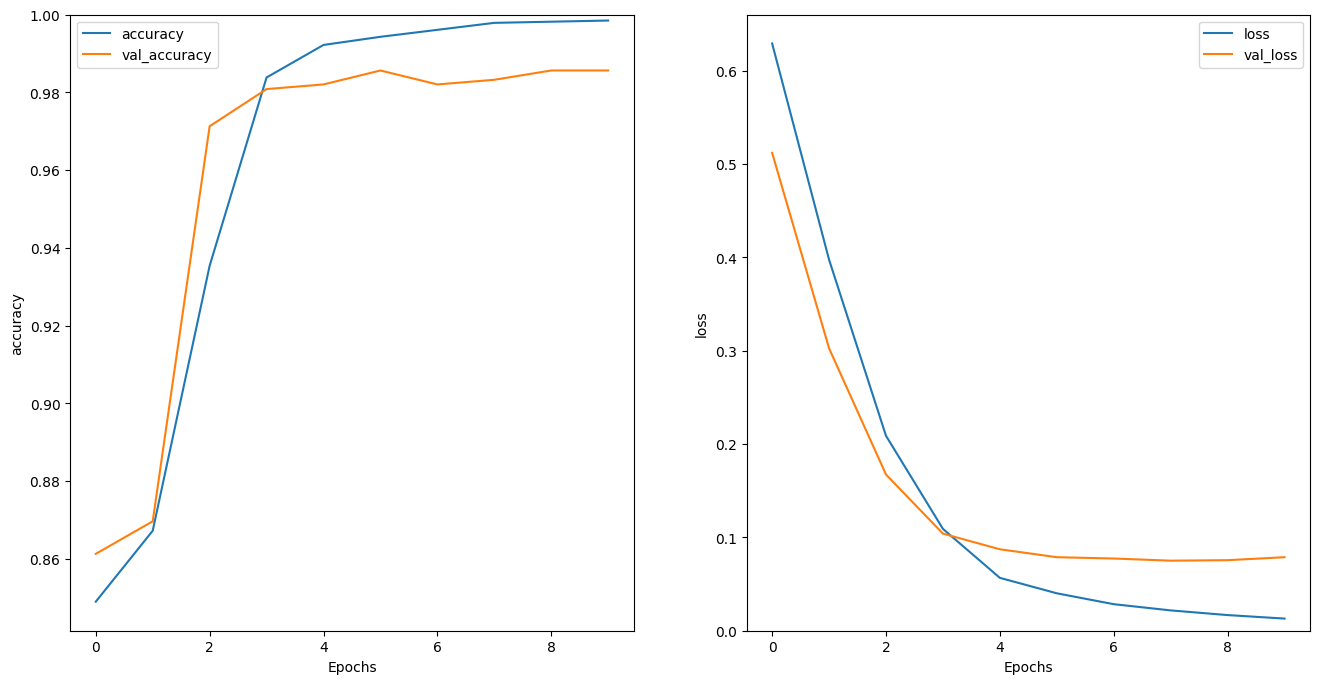

In [194]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [195]:
sample_text = ['you have won £1000 cash! call to claim your prize.']

pred_text = pd.DataFrame(sample_text)
encoder(example_text)
predictions = model.predict(pred_text)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
[[0.0044711]]


In [196]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):

  pred_text_df = pd.DataFrame([pred_text])

  model_prediction = model.predict(pred_text_df)

  prediction = -1
  for pred in model_prediction:
    if pred > 0.5:
      prediction = [np.round(pred[0],2),'ham']
    else:
      prediction = [np.round(pred[0],2),'spam']

  return (prediction)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[1.0, 'ham']


In [197]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
You passed the challenge. Great job!
